Define Classes used to describe people and businesses

In [101]:
class Person:
  def __init__(self, cash, owner=0, business=None, employer=None, wage=0, demand=[], spend=[], consume=[]):
    self.cash = cash
    self.owner = owner
    self.business = business
    self.employer = employer
    self.wage = wage
    self.demand = demand
    self.spend = spend
    self.consume = consume

class Business:
  def __init__(self, owner, cash, bus_type, wage_offer=0, jobs_offer=0, inventory=0, prod=0, supply=0, price=None, revenue=0):
    self.owner = owner
    self.cash = cash
    self.bus_type = bus_type
    self.wage_offer = wage_offer
    self.jobs_offer = jobs_offer
    self.inventory = inventory
    self.prod = prod
    self.supply = supply
    self.price = price
    self.revenue = revenue

# class Asset:
#  def __init__(self, owner, desc, life):
#    self.owner = owner
#    self.desc = desc
#    self.life = life

Choose the number of people and time periods

In [102]:
N = 100              # Initial number of people
T = 365              # Number of time periods (iterations)
t_display = 50       # Gap between displayed iteration counter

In [103]:
cash_endow = [100 for i in range(0,N)]

people = [Person(cash_endow[i]) for i in range(0,N)]
bus_types = []

In [104]:
people[0].owner = 1
people[0].business = 0

people[1].owner = 1
people[1].business = 1

business = [Business(0,1000000,0), Business(1,1000000,1)]

In [105]:
period = []
population = []
unemp_rate = []
money_supply = []
prod_value = []
inv_value = []
cons_value = []
gini_income = []
gini_wealth = []

In [106]:
for t in range(0,T):
    
  if (t + 1) / t_display == round((t + 1) / t_display, 0):
    print(t+1)
    
  for b in business:                        # Businesses list wages and job offers
    b.wage_offer = 10 #*********************************************************************************************
    b.jobs_offer = 49 #*********************************************************************************************
    b.prod = 0
    
  wage_offers = [business[b].wage_offer for b in range(0,len(business))]
  
  unemp_t = 0
  population_t = 0
  money_supply_t = 0
  prod_value_t = 0
  inv_value_t = 0
  cons_value_t = 0
  gini_income_num_t = 0
  gini_income_denom_t = 0
  gini_income_t = 0
  gini_wealth_num_t = 0
  gini_wealth_denom_t = 0
  gini_wealth_t = 0

  for p in people:                          # People get jobs, produce, and get paid
    
    population_t += 1
    
    if p.owner == 0:
      p.employer = None
      wage_max = max(wage_offers)
        
      if business[wage_offers.index(wage_max)].jobs_offer > 0:
        p.employer = wage_offers.index(wage_max)
        p.wage = max(wage_offers)
        p.cash += p.wage
        business[wage_offers.index(wage_max)].cash -= p.wage
        business[wage_offers.index(wage_max)].jobs_offer -= 1
        prod_incr = 10
        business[wage_offers.index(wage_max)].prod += prod_incr
        business[wage_offers.index(wage_max)].inventory += prod_incr
        
        
      if business[wage_offers.index(wage_max)].jobs_offer == 0:
        business[wage_offers.index(wage_max)].wage_offer = 0
    
    if p.owner == 1:
      p.employer = p.business
    
    if p.employer == None:
      unemp_t += 1
    
    wage_offers = [business[i].wage_offer for i in range(0,len(business))]
    
  production = [business[i].prod for i in range(0,len(business))]
  
  supply_by_type = [0 for k in range(0,len(bus_types))]

  for b in business:                        # Update the list of business types
    
    b.supply = b.inventory
    
    if b.bus_type not in bus_types:
      bus_types.append(b.bus_type)
      supply_by_type.append(0)
    
    supply_by_type[bus_types.index(b.bus_type)] += b.supply
                     
    b.price = 10                            # Businesses list prices
    
    prod_value_t += b.price * b.prod
    inv_value_t += b.price * b.inventory
    
  prices = [business[i].price for i in range(0,len(business))]

  for p in people:                          # Business owners decide how much to sell vs. consume
    
    p.demand = [0 for k in range(0,len(bus_types))]
    p.spend = [0 for k in range(0,len(bus_types))]
    p.consume = [0 for k in range(0,len(bus_types))]
    
    if p.owner == 1:
      c = 10
      type_index = bus_types.index(business[p.business].bus_type)
      business[p.business].supply -= c
      business[p.business].inventory -= c
      supply_by_type[type_index] -= c
      p.consume[type_index] = c
      
      cons_value_t += business[p.business].price * c
    
  for p in people:                          # People buy products
    
    for k in range(0,len(bus_types)):
      price_min = max(prices)
      p.demand[k] = 10
        
      while p.demand[k] > 0 and p.cash > 0 and supply_by_type[k] > 0:
      
        for b in business:
          if b.bus_type == bus_types[k] and b.price <= price_min and b.supply > 0:
            price_min = b.price
            bus_index = business.index(b)
    
        if p.cash >= p.demand[k] * price_min and business[bus_index].supply >= p.demand[k]:
          spend_incr = p.demand[k] * price_min
          
        elif p.cash < p.demand[k] * price_min and business[bus_index].supply >= p.demand[k]:
          spend_incr = p.cash
      
        elif p.cash >= p.demand[k] * price_min and business[bus_index].supply < p.demand[k]:
          spend_incr = business[bus_index].supply * price_min
        
        else:
          spend_incr = min(p.cash, business[bus_index].supply * price_min)
        
        p.spend[k] += spend_incr
        p.consume[k] += spend_incr / price_min
        p.cash -= spend_incr
        p.demand[k] -= spend_incr / price_min
        
        cons_value_t += spend_incr
        
        business[bus_index].revenue += spend_incr
        business[bus_index].cash += spend_incr
        business[bus_index].supply -= spend_incr / price_min
        business[bus_index].inventory -= spend_incr / price_min
        supply_by_type[k] -= spend_incr / price_min
        
        spend_incr = 0

  for b in business:
    people[b.owner].wage = 10
    people[b.owner].cash += people[b.owner].wage
    b.cash -= people[b.owner].wage
    money_supply_t += b.cash
    
  for p in people:
    money_supply_t += p.cash
    
    gini_income_denom_t += p.wage
    gini_wealth_denom_t += p.cash
    for q in people:
      gini_income_num_t += abs(p.wage - q.wage)
      gini_wealth_num_t += abs(p.cash - q.cash)
  
  unemp_rate_t = unemp_t / population_t
  gini_income_t = gini_income_num_t / (2 * population_t * gini_income_denom_t)
  gini_wealth_t = gini_wealth_num_t / (2 * population_t * gini_wealth_denom_t)
    
  period.append(t+1)
  population.append(population_t)
  unemp_rate.append(unemp_rate_t)
  money_supply.append(money_supply_t)
  prod_value.append(prod_value_t)
  inv_value.append(inv_value_t)
  cons_value.append(cons_value_t)
  gini_income.append(gini_income_t)
  gini_wealth.append(gini_wealth_t)

50
100
150
200
250
300
350


In [107]:
import pandas as pd
from collections import OrderedDict
from datetime import date

data_dict = {'period':period,
             'population':population,
             'unemp_rate':unemp_rate,
             'money_supply':money_supply,
             'prod_value':prod_value,
             'inv_value':inv_value,
             'cons_value':cons_value,
             'gini_income':gini_income,
             'gini_wealth':gini_wealth}

data_df = pd.DataFrame.from_dict(data_dict)

print(data_df.head())

   cons_value  gini_income  gini_wealth  inv_value  money_supply  period  \
0      9800.0          0.0     0.738714     9800.0     2010000.0       1   
1      2580.0          0.0     0.980000     9800.0     2010000.0       2   
2      1200.0          0.0     0.980000    17020.0     2010000.0       3   
3      1200.0          0.0     0.980000    25620.0     2010000.0       4   
4      1200.0          0.0     0.980000    34220.0     2010000.0       5   

   population  prod_value  unemp_rate  
0         100        9800         0.0  
1         100        9800         0.0  
2         100        9800         0.0  
3         100        9800         0.0  
4         100        9800         0.0  


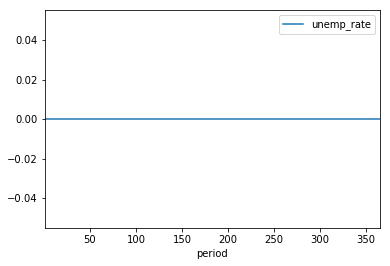

In [108]:
%matplotlib inline

data_df.plot(kind="line", x="period", y="unemp_rate")